In [26]:
import numpy as np
import pandas as pd

In [33]:
class AdalineGD:

    def __init__(self,lr=0.01,random_state=1,n_iter=50):
        self.lr = lr
        self.random_state = random_state
        self.n_iter = n_iter
    
    def net_input(self,X):
        return np.dot(X,self.w[1:])+self.w[0]
    
    def activation(self,X):
        return X
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, size=X.shape[1]+1,scale=0.01)
        self.cost = []
        print(self.w[1:].shape)
        for _ in range(self.n_iter):
            inp = self.net_input(X)
            output = self.activation(inp)
            errors = y-output
            self.w[1:] += self.lr*X.T.dot(errors)
            self.w[0] += self.lr*errors.sum()
            c = (errors**2).sum()/2
            self.cost.append(c)
        print(self.cost)
        return self
    
    def predict(self,X):
        inp = self.net_input(X)
        output = self.activation(inp)
        return np.where(output>0.0,1,-1)

In [34]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

In [35]:
X = df.iloc[:100,[0,1,2]].values
y = df.iloc[:100,4].values
y = np.where(y=='Iris-setosa',-1,1)

In [43]:
X

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [37]:
import matplotlib.pyplot as plt

(3,)
[51.835360489443026, 3975.4499706055276, 9350599.37290381, 22134501892.228485, 52396306780790.87, 1.2403138677209896e+17, 2.9360437499864547e+20, 6.950138288523664e+23, 1.6452214729370263e+27, 3.894532141155487e+30]
(3,)
[51.835360489443026, 48.97481202816251, 47.09851256513984, 45.510397640407746, 44.03273089921082, 42.619203181117385, 41.2568611645341, 39.9412472640262, 38.67009683112954, 37.441739222303326]
(3,)
[51.835360489443026, 48.97481202816251, 47.09851256513984, 45.510397640407746, 44.03273089921082, 42.619203181117385, 41.2568611645341, 39.9412472640262, 38.67009683112954, 37.441739222303326, 36.25469122637011, 35.10755276893788, 33.9989792782858, 32.92767352331619, 31.892382426110125, 30.891895173028022, 29.925041691299914, 28.990691253377204, 28.08775114760709, 27.21516539851535, 26.371913531358203, 25.55700937852443, 24.769499926144867, 24.008464199497734, 23.273012185890476, 22.56228379375419, 21.875447846732378, 21.211701111587367, 20.570267358787124, 19.950396454

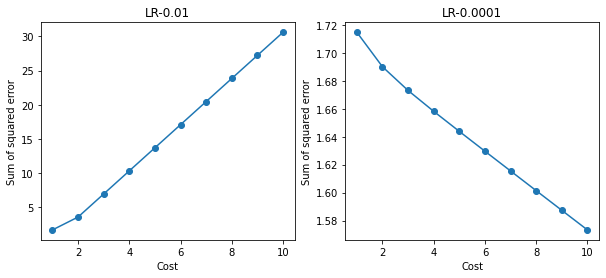

In [45]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ada1 = AdalineGD(n_iter=10,lr=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost)+1),np.log10(ada1.cost),marker='o')
ax[0].set_xlabel('Cost')
ax[0].set_ylabel('Sum of squared error')
ax[0].set_title('LR-0.01')
ada2 = AdalineGD(n_iter=10,lr=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost)+1),np.log10(ada2.cost),marker='o')
ax[1].set_xlabel('Cost')
ax[1].set_ylabel('Sum of squared error')
ax[1].set_title('LR-0.0001')
ada2 = AdalineGD(n_iter=200,lr=0.0001).fit(X,y)
print(ada2.predict(X[0]),y[0])